<a href="https://colab.research.google.com/github/SlowikJakub/AI-Homework/blob/Homework0/Homework0Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [2]:
netG=ResNetGenerator()

model_path='/content/drive/MyDrive/AI images/horse2zebra_0.4.0.pth'
model_data=torch.load(model_path)
netG.load_state_dict(model_data)


<All keys matched successfully>

In [3]:
netG.eval()


ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [4]:
from PIL import Image
from torchvision import transforms
preprocess=transforms.Compose([transforms.Resize(256),
                               transforms.ToTensor()])

In [5]:
img1=Image.open("/content/drive/MyDrive/AI images/horses/horse1.jpg")
img2=Image.open("/content/drive/MyDrive/AI images/horses/horse2.jpg")
img3=Image.open("/content/drive/MyDrive/AI images/horses/horse3.jpg")
img4=Image.open("/content/drive/MyDrive/AI images/horses/multiplehorses.jpg")
img5=Image.open("/content/drive/MyDrive/AI images/horses/multiplehorses2.jpg")

In [6]:
ppimg1=preprocess(img1)
ppimg2=preprocess(img2)
ppimg3=preprocess(img3)
ppimg4=preprocess(img4)
ppimg5=preprocess(img5)

In [7]:
batch_t1=torch.unsqueeze(ppimg1,0)
batch_t2=torch.unsqueeze(ppimg2,0)
batch_t3=torch.unsqueeze(ppimg3,0)
batch_t4=torch.unsqueeze(ppimg4,0)
batch_t5=torch.unsqueeze(ppimg5,0)

In [8]:
batch_out1=netG(batch_t1)
batch_out2=netG(batch_t2)
batch_out3=netG(batch_t3)
batch_out4=netG(batch_t4)
batch_out5=netG(batch_t5)

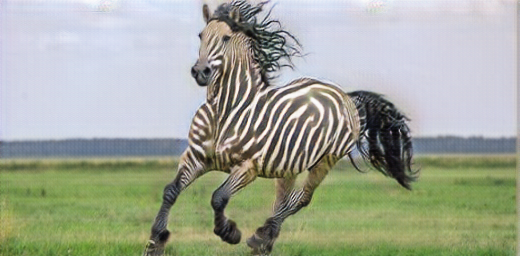

In [9]:
out_t1 = (batch_out1.data.squeeze() + 1.0) / 2.0
out_img1 = transforms.ToPILImage()(out_t1)
out_img1

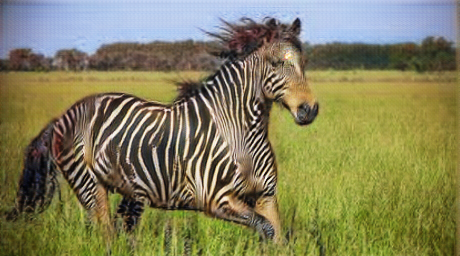

In [10]:
out_t2 = (batch_out2.data.squeeze() + 1.0) / 2.0
out_img2 = transforms.ToPILImage()(out_t2)
out_img2

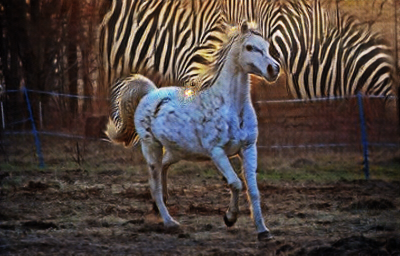

In [11]:
out_t3 = (batch_out3.data.squeeze() + 1.0) / 2.0
out_img3 = transforms.ToPILImage()(out_t3)
out_img3

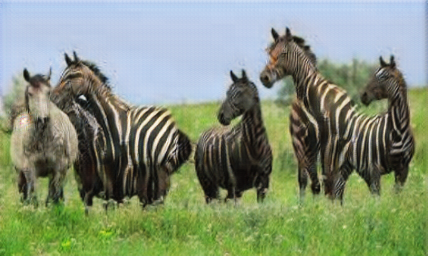

In [12]:
out_t4 = (batch_out4.data.squeeze() + 1.0) / 2.0
out_img4 = transforms.ToPILImage()(out_t4)
out_img4

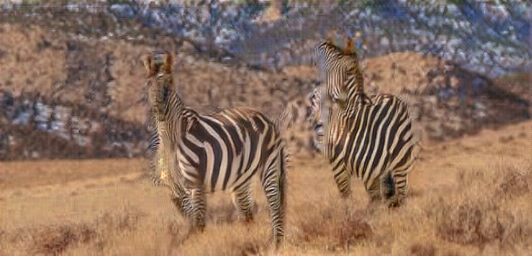

In [13]:
out_t5 = (batch_out5.data.squeeze() + 1.0) / 2.0
out_img5 = transforms.ToPILImage()(out_t5)
out_img5